In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
min_values=[]


for i in range(4):

    for v in range(5):
        log=r'{}-{}'.format(2*i+1,v)
        validation_path=r'/Users/lucascurtin/Desktop/QGNN Repos/qtrkx-gnn-tracking/logs/test_CGNN/run{}-{}/log_validation.csv'.format(2*i+1,v)
        validation_data = pd.read_csv(validation_path)
        validation_array=np.array(validation_data['loss'])
        minimum_value=np.min(validation_array)
        min_values.append(minimum_value)


        


In [3]:
splits = [min_values[i:i+5] for i in range(0,len(min_values),5)]

In [4]:
splits

[[0.476975, 0.476886, 0.477283, 0.476503, 0.475919],
 [0.456342, 0.460792, 0.449993, 0.456658, 0.453945],
 [0.443734, 0.447816, 0.450028, 0.447724, 0.456625],
 [0.459602, 0.445871, 0.455531, 0.447694, 0.447833]]

In [5]:
mean_values=[]
error_values=[]
for i in range(4):
    mean=np.mean(splits[i])
    error=np.std(splits[i])
    mean_values.append(mean)
    error_values.append(error)

In [6]:
error_values

[0.0004686168584248807,
 0.0035437179910371014,
 0.004237601472531362,
 0.005316422458759282]

/var/folders/vv/3kknmbxs3q529fs8c77mr2n80000gn/T/ipykernel_50273/4175099602.py:4: MatplotlibDeprecationWarning: Saw kwargs ['mew', 'markeredgewidth'] which are all aliases for 'markeredgewidth'.  Kept value from 'markeredgewidth'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  plt.errorbar(iters, y, yerr=e, marker='s', ms=2, mew=4,capsize=10, elinewidth=1,markeredgewidth=2)


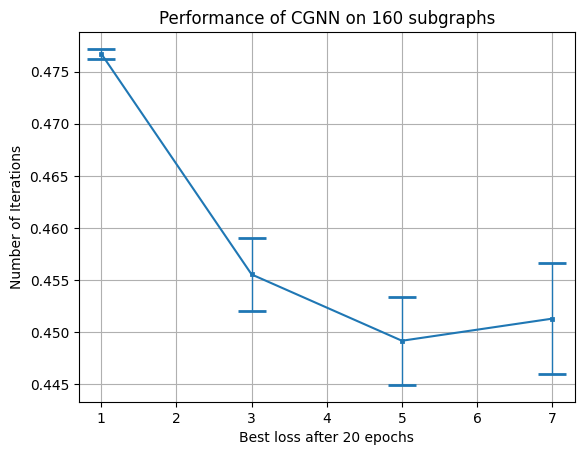

In [7]:
iters=[1,3,5,7]
y = mean_values
e = error_values
plt.errorbar(iters, y, yerr=e, marker='s', ms=2, mew=4,capsize=10, elinewidth=1,markeredgewidth=2)
plt.grid()
plt.xlabel("Best loss after 20 epochs")
plt.ylabel("Number of Iterations")
plt.title("Performance of CGNN on 160 subgraphs")
plt.show()

In [9]:
diff=np.max(mean_values)-np.min(mean_values)
print(diff)

0.02752779999999999
